In [1]:
!pip install pandas numpy plotly dash jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00


In [10]:
from google.colab import files
uploaded = files.upload()

Saving calories.csv to calories.csv


In [11]:
import pandas as pd
df = pd.read_csv('calories.csv')

In [12]:
print(df.info())
print("______________________________________________________________")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  int64  
 3   Weight      15000 non-null  int64  
 4   Duration    15000 non-null  int64  
 5   Heart_Rate  15000 non-null  int64  
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 937.6+ KB
None
______________________________________________________________
   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68     190      94        29         105       40.8       231
1  female   20     166      60        14          94       40.3        66
2    male   69     179      79         5          88       38.7        26
3  female   34     179      71        13         100  

In [14]:
df['Gender']=df['Gender'].replace({'male':0,'female':1}).astype(int)

/tmp/ipython-input-14-1994649657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'male':0,'female':1}).astype(int)


In [15]:
df.shape

(15000, 8)

In [17]:
df.describe

<bound method NDFrame.describe of        Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0           0   68     190      94        29         105       40.8       231
1           1   20     166      60        14          94       40.3        66
2           0   69     179      79         5          88       38.7        26
3           1   34     179      71        13         100       40.5        71
4           1   27     154      58        10          81       39.8        35
...       ...  ...     ...     ...       ...         ...        ...       ...
14995       1   20     193      86        11          92       40.4        45
14996       1   27     165      65         6          85       39.2        23
14997       1   43     159      58        16          90       40.1        75
14998       0   78     193      97         2          84       38.3        11
14999       0   63     173      79        18          92       40.5        98

[15000 rows x 8 columns]>

In [18]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [19]:
df.duplicated().sum()

np.int64(1)

In [20]:
df.loc[df.duplicated(keep=False),:]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
8266,1,28,164,59,9,90,39.5,40
12852,1,28,164,59,9,90,39.5,40


In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

In [24]:
import plotly.express as px
fig1=px.scatter(df,x='Duration',y='Body_Temp',color='Gender',hover_data=['Age','Calories'],title='Body temperature vs duration',
                labels={'Body_Temp':'Body Temperature','Duration':'Duration of exercise'}
)
fig1.update_traces(marker_size=7)
fig1.show()

In [26]:
df_max=df.max()
df=df.divide(df_max)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0.0,0.860759,0.855856,0.712121,0.966667,0.820312,0.983133,0.735669
1,1.0,0.253165,0.747748,0.454545,0.466667,0.734375,0.971084,0.210191
2,0.0,0.873418,0.806306,0.598485,0.166667,0.687500,0.932530,0.082803
3,1.0,0.430380,0.806306,0.537879,0.433333,0.781250,0.975904,0.226115
4,1.0,0.341772,0.693694,0.439394,0.333333,0.632812,0.959036,0.111465


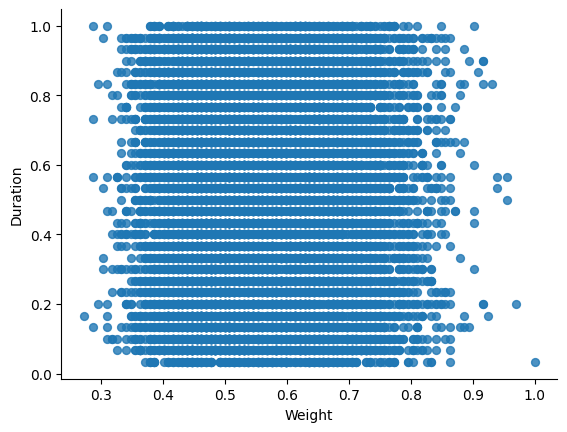

In [27]:
# @title Weight vs Duration

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
x=df.drop('Calories',axis=1)
y=df['Calories']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(y_train)

9838     0.633758
7689     0.652866
6557     0.156051
6872     0.429936
820      0.073248
           ...   
5191     0.480892
13419    0.222930
5390     0.130573
860      0.181529
7270     0.187898
Name: Calories, Length: 11999, dtype: float64


In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11999, 7) (11999,)
(3000, 7) (3000,)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:
import numpy as np
import pandas as pd

In [47]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = rf_model.score(x_test, y_test)

print(f'Random Forest MAE: {mae_rf:.4f}')
print(f'Random Forest MSE: {mse_rf:.4f}')
print(f'Random Forest RMSE: {rmse_rf:.4f}')
print(f'Random Forest R² Score: {r2_rf:.4f}')

Random Forest MAE: 0.0056
Random Forest MSE: 0.0001
Random Forest RMSE: 0.0093
Random Forest R² Score: 0.9978


In [48]:
sample_idx = 1
sample_features = x_test.iloc[sample_idx:sample_idx+1]

predicted_normalized_score = rf_model.predict(sample_features)

predicted_cal = predicted_normalized_score[0] * df_max['Calories']
actual_cal = y_test.iloc[sample_idx] * df_max['Calories']

print(f'actual calories are: {actual_cal:.2f}')
print(f'predicted calories are: {predicted_cal:.2f}')

actual calories are: 223.00
predicted calories are: 228.39
